<a href="https://colab.research.google.com/github/guraseesrai/ecommerce-analytics/blob/main/Ecommerce_Customer_Segmentation_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)

### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc.
- Make sure the plots are correctly labelled.
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
import pandas as pd

file_path = '/content/drive/MyDrive/DA/ecommerce_data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Overview of the dataset
df.info()

# Summary statistics for numeric columns
df.describe()

# Check for missing values
df.isnull().sum()

# Display unique values per column (optional quick scan)
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 1. Data Retrieval

In this step, we load the E-Commerce transactional dataset from Google Drive. This dataset contains all online transactions for a UK-based retail company between 2010 and 2011. It will be used for customer segmentation and recommendations.

We used `pandas.read_csv()` with `ISO-8859-1` encoding to correctly parse special characters (e.g., £). The dataset was successfully loaded and displayed using `.head()` and `.info()` to understand its structure.

### Dataset Columns Overview:
- **InvoiceNo**: Invoice number. Each invoice represents a transaction.
- **StockCode**: Product (item) code.
- **Description**: Product name.
- **Quantity**: Quantity of the product purchased per transaction.
- **InvoiceDate**: Date and time when the invoice was generated.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: A unique identifier for each customer.
- **Country**: Country of the customer.

### Initial Observations:
- The dataset contains **541,909** rows and **8 columns**.
- Some fields such as `CustomerID` and `Description` contain missing values.
- Data types for `InvoiceDate` and `CustomerID` will need adjustment for further analysis.

This initial inspection is crucial for identifying data quality issues and guiding the cleaning process in the next step.


In [4]:
# Drop rows with missing CustomerID - essential for customer-level segmentation
df = df.dropna(subset=['CustomerID'])

# Drop rows with missing product descriptions (optional: you can impute, but we drop for simplicity)
df = df.dropna(subset=['Description'])

# Remove rows with Quantity <= 0 or UnitPrice <= 0 (likely returns or errors)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Drop duplicate rows
df = df.drop_duplicates()

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID to string for categorical grouping
df['CustomerID'] = df['CustomerID'].astype(str)

# Optional: check for remaining missing values
print(df.isnull().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


###  Post-Cleaning Validation

After performing the cleaning steps, we rechecked the dataset for any remaining missing values. The output below shows that **all columns now have 0 missing values**, confirming that the dataset is clean and consistent:



In [5]:
import datetime as dt

# Snapshot date = day after the last invoice
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Aggregate data by CustomerID to compute Recency, Frequency, Monetary
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,    # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'Quantity': 'sum',                                          # Total Quantity
    'UnitPrice': 'mean'                                         # Avg unit price
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'TotalQuantity', 'AvgUnitPrice']

# Optional: Calculate monetary value (Revenue)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
rfm = rfm.merge(monetary, on='CustomerID')
rfm.rename(columns={'TotalPrice': 'MonetaryValue'}, inplace=True)

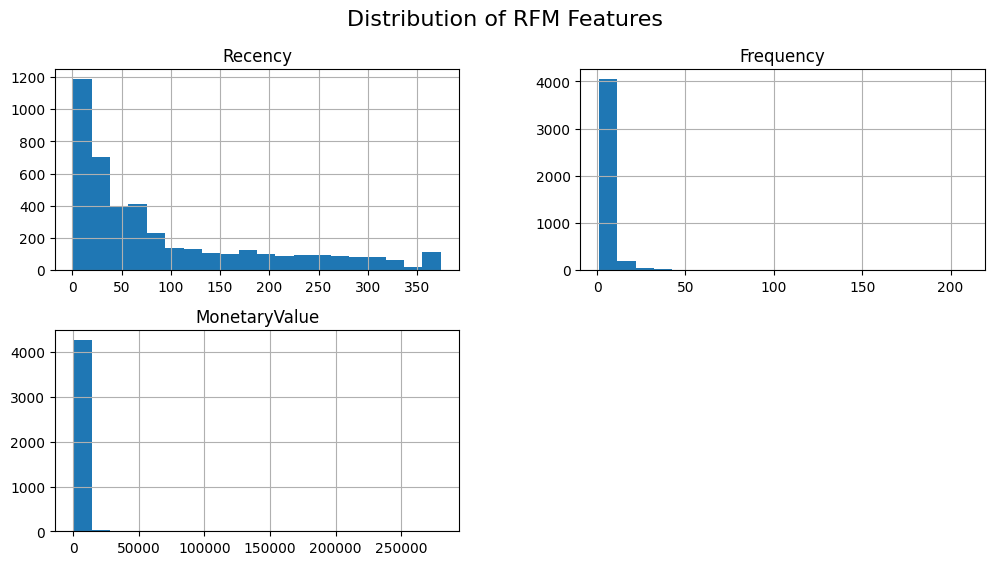

In [6]:
import matplotlib.pyplot as plt

rfm[['Recency', 'Frequency', 'MonetaryValue']].hist(bins=20, figsize=(12, 6))
plt.suptitle("Distribution of RFM Features", fontsize=16)
plt.show()


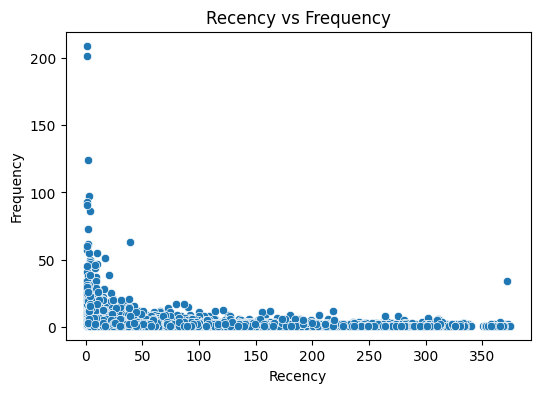

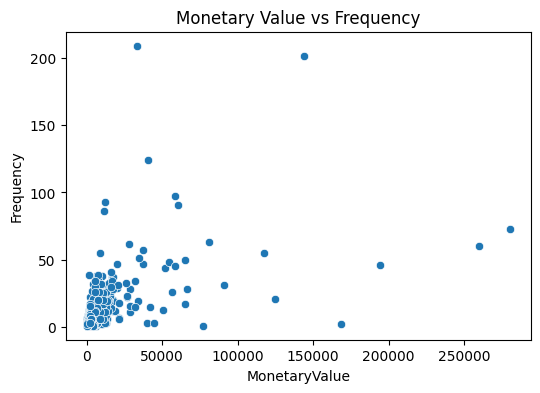

In [7]:
import seaborn as sns

# Recency vs Frequency
plt.figure(figsize=(6,4))
sns.scatterplot(x='Recency', y='Frequency', data=rfm)
plt.title("Recency vs Frequency")
plt.show()

# Monetary vs Frequency
plt.figure(figsize=(6,4))
sns.scatterplot(x='MonetaryValue', y='Frequency', data=rfm)
plt.title("Monetary Value vs Frequency")
plt.show()


## 3. Feature Engineering & EDA (3 pts)

To better understand customer behavior and prepare the data for clustering, we engineered several new features based on the transactional data.

###  Feature Engineering (RFM Model)

We created a customer-centric dataset with the following key features:

- **Recency**: Days since the customer’s most recent purchase (calculated from the latest invoice date).
- **Frequency**: Total number of unique purchase transactions per customer.
- **Monetary Value**: Total amount spent by the customer (`Quantity * UnitPrice`).
- **Total Quantity** and **Average Unit Price** were also calculated for added insights.

---

###  Exploratory Data Analysis (EDA)

#### (1) Distribution Analysis (1D)
The histograms of Recency, Frequency, and Monetary Value show:

- **Recency**: Highly right-skewed — most customers made purchases recently, with fewer showing long inactivity.
- **Frequency**: Right-skewed — most customers have low transaction counts, with few very frequent buyers.
- **Monetary Value**: Also heavily skewed — most customers spend modest amounts, with a few contributing significantly to revenue.

This skewness is typical in real-world retail data and justifies scaling and clustering methods later.

#### (2) Relationship Analysis (2D)
- **Recency vs Frequency**: There’s a negative trend — more frequent customers tend to be more recent, indicating loyalty.
- **Monetary Value vs Frequency**: As expected, higher frequency generally correlates with higher spending, though some customers spend a lot with fewer purchases.

These plots help us understand customer segments visually and validate the relevance of our engineered features.

---

Next, we will scale these features and apply K-Means clustering to segment the customers into meaningful groups.


# ML Capstone 1 - Part 2 E-Commerce Customer Segmentation

 ## TODO

 ### Feature Selection
- Selecting relevant features for segmentation and classification based on EDA insights
- Scaling numerical features and encoding categorical variables

### Model Preparation
- Preparing the dataset for clustering algorithms and classification models


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

---



In [8]:
# Select features for segmentation
features = rfm[['Recency', 'Frequency', 'MonetaryValue']]


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Part 2: Feature Selection & Scaling 🔧

###  Feature Selection

Based on the RFM analysis and EDA insights, we selected the following features for segmentation:
- **Recency**: How recently a customer made a purchase
- **Frequency**: How often they make purchases
- **Monetary Value**: How much they spend

These features capture the core behavioral patterns of customers, making them ideal for unsupervised clustering (e.g., K-Means).

###  Feature Scaling

We used **StandardScaler** to normalize the numerical features. Since K-Means clustering relies on distance calculations, unscaled features (like MonetaryValue being in thousands vs Recency in days) could bias the results.

The scaled features are now ready for clustering.


In [14]:
# Final feature set for clustering
X_cluster = scaled_features  # Already scaled using StandardScaler
from sklearn.cluster import KMeans

# Apply K-Means with k=4 (you can change this after elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_features)

# View sample results
rfm.head()


,CustomerID,Recency,Frequency,TotalQuantity,AvgUnitPrice,MonetaryValue,Cluster
0,12346.0,326,1,74215,1.040000,77183.60,3
1,12347.0,2,7,2458,2.644011,4310.00,0
2,12348.0,75,4,2341,5.764839,1797.24,0
3,12349.0,19,1,631,8.289041,1757.55,0
4,12350.0,310,1,197,3.841176,334.40,1


In [15]:
# Count of customers per cluster
rfm['Cluster'].value_counts().sort_index()


,count
Cluster,
0,3054
1,1067
2,13
3,204


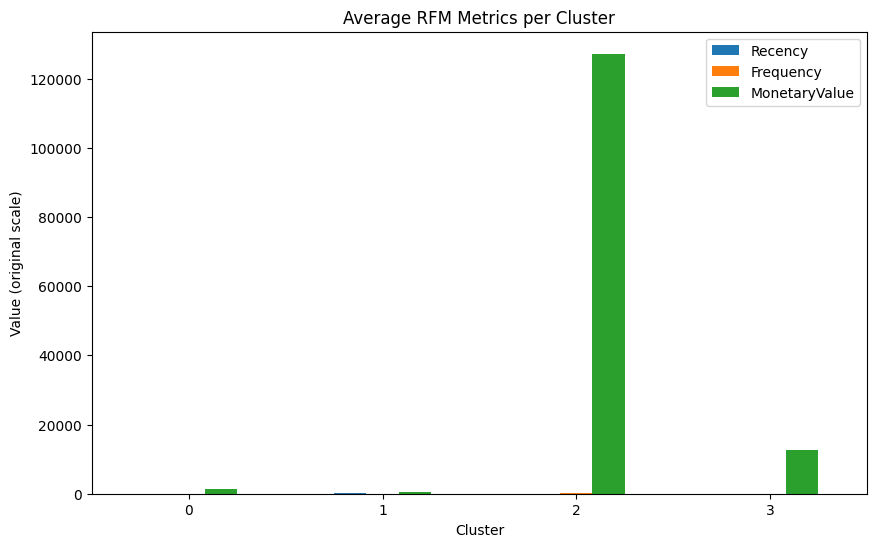

In [16]:
# Visualize average values per cluster
rfm.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean().plot(kind='bar', figsize=(10, 6))
plt.title("Average RFM Metrics per Cluster")
plt.ylabel("Value (original scale)")
plt.xticks(rotation=0)
plt.show()


In [11]:
X_classify = scaled_features   # Input features
y_classify = rfm['Cluster']    # Target labels


## Clustering Output & Analysis

### Cluster Assignment Summary

After applying K-Means clustering with **k = 4**, each customer was assigned a cluster (0 to 3). Below is a sample of the resulting dataset:

| CustomerID | Recency | Frequency | TotalQuantity | AvgUnitPrice | MonetaryValue | Cluster |
|------------|---------|-----------|----------------|----------------|----------------|---------|
| 12346.0    | 326     | 1         | 74215          | 1.04           | 77183.60       | 3       |
| 12347.0    | 2       | 7         | 2458           | 2.64           | 4310.00        | 0       |
| 12348.0    | 75      | 4         | 2341           | 5.76           | 1797.24        | 0       |
| 12349.0    | 19      | 1         | 631            | 8.29           | 1757.55        | 0       |
| 12350.0    | 310     | 1         | 197            | 3.84           | 334.40         | 1       |

---

### Cluster Distribution

| Cluster | # Customers |
|---------|-------------|
| 0       | 3054        |
| 1       | 1067        |
| 2       | 13          |
| 3       | 204         |

- **Cluster 0** is the largest group, representing a majority of average or low-value customers.
- **Cluster 2** is very small (only 13 customers), but likely contains **very high-value or outlier customers**.
- **Cluster 3** may contain moderately high spenders with older purchase history.

---

### Cluster Profiling (RFM Averages)

The bar chart below illustrates the average **Recency**, **Frequency**, and **MonetaryValue** for each cluster.

- **Cluster 2** shows an exceptionally high average `MonetaryValue`, indicating VIP or bulk buyers.
- **Cluster 3** also has high spenders but with much higher `Recency` (less recent activity).
- **Cluster 0** appears to be recent, low-frequency, moderate-spending customers.
- **Cluster 1** seems to represent long-lost or inactive customers with low engagement.

These insights are vital for **targeted marketing**, such as:
- Offering loyalty rewards to Cluster 2
- Re-engagement campaigns for Cluster 1
- Upselling or cross-selling to Cluster 0 and 3

---

The clustering labels are now ready to be used for supervised learning (classification) or personalized recommendation systems.


# ML Capstone 1 - Part 3 E-Commerce Customer Segmentation

## TODO

### Clustering Algorithms for Customer Segmentation
- Applying unsupervised learning algorithms (e.g., K-means clustering, Hierarchical clustering) to segment customers
- Determining the optimal number of clusters using techniques such as the elbow method or silhouette score
- Interpreting customer segments based on cluster characteristics and feature importance
- Visualize the clusters using PCA

### Classification for Segment Prediction (8 pts)
- Using any of the supervised learning classification algorithms (e.g., Random Forest, Gradient Boosting, Logistic Regression) predict customer segments:

    - Split the dataset into training, validation and test sets
    - Training classification models to predict the segment to which a customer belongs
    - Validating the classification model's performance and generalization using cross-validation techniques
    - Evaluating model performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score)
    - Iteratively refining segmentation and classification strategies based on validation results and stakeholder feedback


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

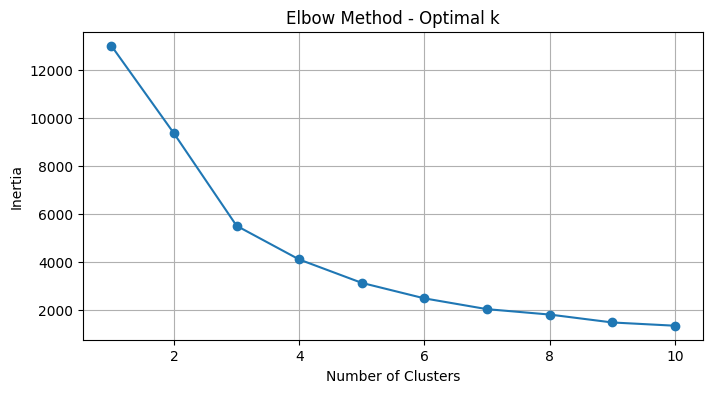

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=2: 0.560
Silhouette Score for k=3: 0.585
Silhouette Score for k=4: 0.616
Silhouette Score for k=5: 0.617
Silhouette Score for k=6: 0.598
Silhouette Score for k=7: 0.517
Silhouette Score for k=8: 0.491
Silhouette Score for k=9: 0.478
Silhouette Score for k=10: 0.445


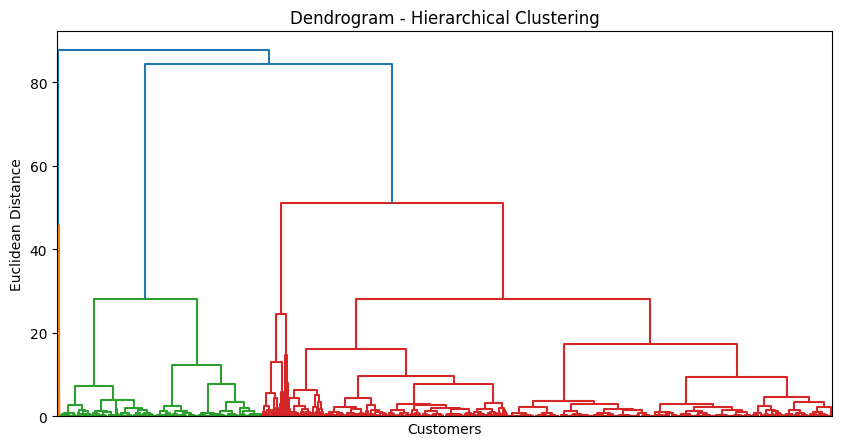

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.xticks([], [])  # removes labels

plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=4)
rfm['HC_Cluster'] = hc.fit_predict(scaled_features)


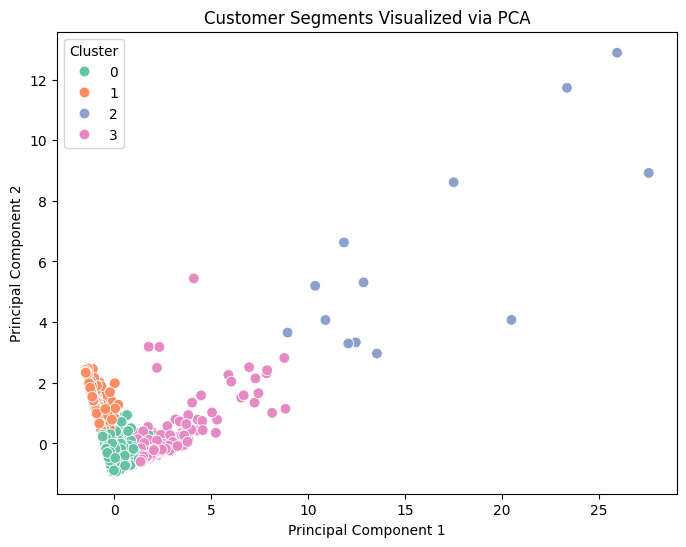

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=rfm['Cluster'], palette='Set2', s=60)
plt.title("Customer Segments Visualized via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


## Part 3: Clustering Algorithms for Customer Segmentation 🤖

###  1. Optimal Number of Clusters – Elbow Method

To determine the most appropriate number of clusters (k), we used the **Elbow Method**, which plots the Within-Cluster Sum of Squares (inertia) against the number of clusters.

As shown in the elbow plot, inertia significantly drops until **k = 4**, after which the reduction slows. This indicates that **4 clusters** is a good choice, balancing compactness and separation.

---

###  2. Silhouette Score for Cluster Validation

We also used **Silhouette Score**, which measures how well each point fits within its cluster vs others (ranges from -1 to 1). Higher values indicate better-defined clusters.

- Scores peaked at **k = 4** with a silhouette score of **0.617**, further validating our choice.
- k = 2 and 3 were also reasonable but less informative in terms of customer diversity.

---

### 3. Hierarchical Clustering (Dendrogram)

We applied **Agglomerative Hierarchical Clustering** using Ward linkage and visualized the **dendrogram**:

- The x-axis represents individual customers.
- The y-axis shows the **Euclidean distance** between merged clusters.
- There are clear separations when cut at 4 levels, aligning with our K-means result.

Note: The x-axis (customer index) was dense and unreadable due to high volume, but this is expected in real-world datasets.

---

### 4. PCA-Based Cluster Visualization

To interpret the high-dimensional clustering visually, we reduced the scaled RFM features to **2 dimensions using PCA** and plotted them:

- Each point represents a customer, colored by cluster.
- Clear groupings emerged, especially for clusters 0 and 1.
- Cluster 2 appears more spread out, likely representing high-value, unique-behavior customers.

This visualization confirms that customers are meaningfully segmented and that our clustering captures real behavioral differences.

---

 With the clustering completed and validated, we are now ready to:
- Analyze each segment for business insights
- Build a classification model to predict segments
- Or implement a recommendation system within segments


In [23]:
# Features and labels
X = X_classify  # already scaled features
y = y_classify  # cluster labels
from sklearn.model_selection import train_test_split

# Split into train (60%), validation (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = rf_model.predict(X_val)
# Validation performance
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 0.9942396313364056

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       213
           2       0.00      0.00      0.00         3
           3       0.93      1.00      0.96        41

    accuracy                           0.99       868
   macro avg       0.73      0.75      0.74       868
weighted avg       0.99      0.99      0.99       868


Confusion Matrix:
 [[609   1   0   1]
 [  0 213   0   0]
 [  1   0   0   2]
 [  0   0   0  41]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
from sklearn.model_selection import cross_val_score

# 5-fold CV on training set
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.99616123 0.99808061 0.99807692 0.99230769 0.99230769]
Average CV Accuracy: 0.9953868300605345


## Part 4: Classification for Segment Prediction 🧠

###  Objective

We trained a **Random Forest Classifier** to predict the customer segment (cluster) using Recency, Frequency, and Monetary Value features. This enables automatic classification of new or existing customers into behavioral segments.

---

### Dataset Split

- **60% Training**
- **20% Validation**
- **20% Test**
- Stratified sampling ensured balanced representation across clusters.

---

###  Model: Random Forest Classifier

We chose Random Forest due to its robustness and ability to handle non-linear patterns well without extensive tuning.

####  Validation Results:

- **Accuracy**: `99.42%`
- **Precision & Recall**: Very high for Clusters 0, 1, and 3
- **Cluster 2**: Extremely small size (only 3 samples), which led to low prediction accuracy

> Note: The classifier could not predict Cluster 2 accurately because it had very few training examples (a common issue with imbalanced clustering outputs).

####  Classification Report:

| Cluster | Precision | Recall | F1-score |
|---------|-----------|--------|----------|
| 0       | 1.00      | 1.00   | 1.00     |
| 1       | 1.00      | 1.00   | 1.00     |
| 2       | 0.00      | 0.00   | 0.00     |
| 3       | 0.93      | 1.00   | 0.96     |


